In [0]:
import cv2
import matplotlib.pyplot as plt

In [0]:
import numpy as np

def normalized_histogram(img):
  H = np.zeros((256))
  for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
      H[img[i,j]] += 1
  H = H/(img.shape[0]*img.shape[1])
  return H

In [0]:
def equalize(img):
  h = normalized_histogram(img)
  A = np.zeros((256))
  A[0] = h[0]
  for i in range(1, 256):
    A[i] = A[i-1] + h[i]
  Out = np.zeros(img.shape)
  for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
      Out[i,j] = A[img[i,j]]
  return (255*Out).astype('uint8')

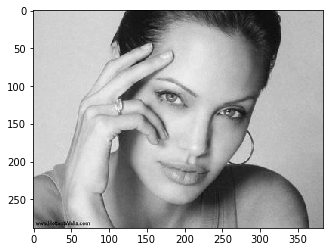

In [0]:
imc = cv2.imread("contrast2.jpeg", 0)
plt.imshow(imc, cmap = "gray") 
plt.show()

In [0]:
def subdivision(image):
  fil = int(image.shape[0]/8)
  col = int(image.shape[1]/8)
  out = np.zeros(image.shape)
  for i in range(0, image.shape[0], fil):
    for j in range(0, image.shape[1], col):
      out[i:i+fil, j:j+col] = equalize(image[i:i+fil, j:j+col])
  
  return out.astype('uint8')
  

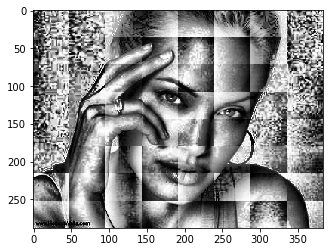

In [0]:
imsub = subdivision(imc)
plt.imshow(imsub, cmap = "gray") 
plt.show()